In [81]:
import cv2   
import numpy as np   
import matplotlib.pyplot as plt
import imutils
from scipy.spatial import ConvexHull

In [132]:
coordinates = []
def click_event(event, x, y, flags, params):
  
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         cv2.putText(img, str(x) + ',' +
#                     str(y), (x,y), font,
#                     1, (255, 0, 0), 2)
        cv2.imshow('image', img)
        coordinates.append([x,y])
  
    # checking for right mouse clicks     
    if event==cv2.EVENT_RBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         b = img[y, x, 0]
#         g = img[y, x, 1]
#         r = img[y, x, 2]
#         cv2.putText(img, str(b) + ',' +
#                     str(g) + ',' + str(r),
#                     (x,y), font, 1,
#                     (255, 255, 0), 2)
        cv2.imshow('image', img)
        coordinates.append([x,y])

In [133]:
fileName = 'vis_Bakul_002_000970.png'
imgDirPath = 'F:\\IIIT-H Work\\win_det_heatmaps\\rrcServerData\\templateMatching\\images\\resnet\\'
imgPath = imgDirPath + fileName
# Reading the main image   
img = cv2.imread(imgPath,1)
img_rgb = np.copy(img)

336   395
341   508
496   503
496   395


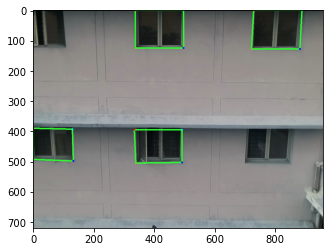

In [134]:
plt.figure()
plt.imshow(img)
cv2.imshow('image', img)

# setting mouse hadler for the image
# and calling the click_event() function
cv2.setMouseCallback('image', click_event)

# wait for a key to be pressed to exit
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()

In [31]:
print(coordinates)

[[337, 104], [342, 247], [501, 252], [504, 108]]


In [135]:
# Loop through list to find range of x and y

def calculateRange(coordinates, padding, imageShape):
    minX = maxX = coordinates[0][0]
    minY = maxY = coordinates[0][1]
    startX = startY = endX = endY = 0
    h,w,c = imageShape
    for i in range(len(coordinates)):
        if minX > coordinates[i][0]:
            minX = coordinates[i][0]
        if maxX < coordinates[i][0]:
            maxX = coordinates[i][0]

        if minY > coordinates[i][1]:
            minY = coordinates[i][1]
        if maxY < coordinates[i][1]:
            maxY = coordinates[i][1]
    
    if (minX - padding < 0):
        startX = 0
    else:
        startX = minX - padding
    if (minY - padding < 0):
        startY = 0
    else:
        startY = minY - padding
    if (maxX + padding >= w):
        endX = w - 1
    else:
        endX = maxX + padding
    if (maxY + padding >= h):
        endY = h - 1
    else:
        endY = maxY + padding
    return startX, endX, startY, endY

326 506 385 518


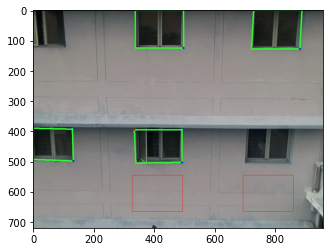

In [139]:
padding = 10
startX, endX, startY, endY = calculateRange(coordinates, padding, img_rgb.shape)
plt.imshow(img_rgb)
print(startX, endX, startY, endY)

In [9]:
img_rgb.shape

(720, 960, 3)

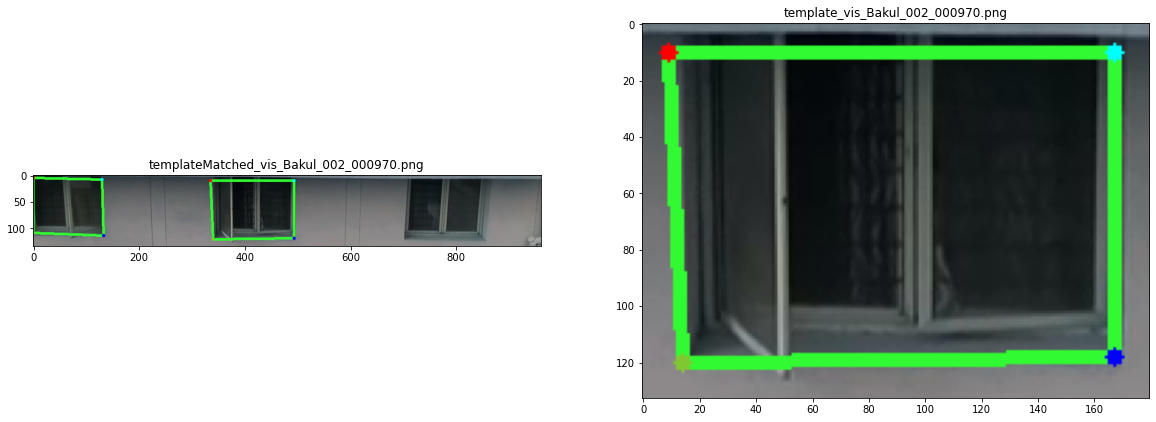

In [137]:
template = img_rgb[startY:endY, startX:endX, :]
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.imshow(template)
plt.title('template_' + str(fileName)) 
searchImg = img_rgb[startY:endY, : ,:]
plt.subplot(1, 2, 1)
plt.imshow(searchImg)
plt.title('templateMatched_' + str(fileName)) 
plt.show()

Text(0.5, 1.0, 'rotatedTemplate_vis_Bakul_005_000350.png')

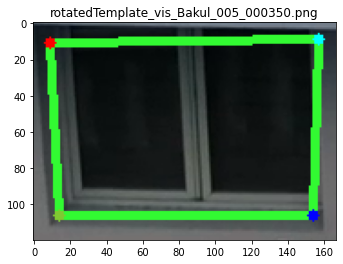

In [130]:
# Apply rotation and shear to template
rotatedTemplate = imutils.rotate(template, 0)
plt.imshow(rotatedTemplate)
plt.title('rotatedTemplate_' + str(fileName)) 

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([ 88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
      dtype=int64))
x: 88 y: 0
x: 89 y: 0
x: 90 y: 0
x: 91 y: 0
x: 92 y: 0
x: 93 y: 0
x: 94 y: 0
x: 95 y: 0
x: 96 y: 0
x: 97 y: 0
x: 98 y: 0
x: 99 y: 0
x: 100 y: 0
x: 101 y: 0
x: 102 y: 0
x: 103 y: 0
x: 104 y: 0
x: 105 y: 0
x: 106 y: 0
x: 107 y: 0
x: 108 y: 0
x: 109 y: 0
x: 110 y: 0
x: 111 y: 0
x: 112 y: 0
x: 113 y: 0
x: 114 y: 0
x: 115 y: 0
x: 116 y: 0
x: 117 y: 0
x: 118 y: 0
x: 119 y: 0
x: 120 y: 0
x: 121 y: 0
x: 122 y: 0
x: 123 y: 0
x: 124 y: 0
x: 125 y: 0
x: 126 y: 0
x: 127 y: 0
x: 128 y: 0
x: 129 y: 0
x: 130

Text(0.5, 1.0, 'Result on search Image')

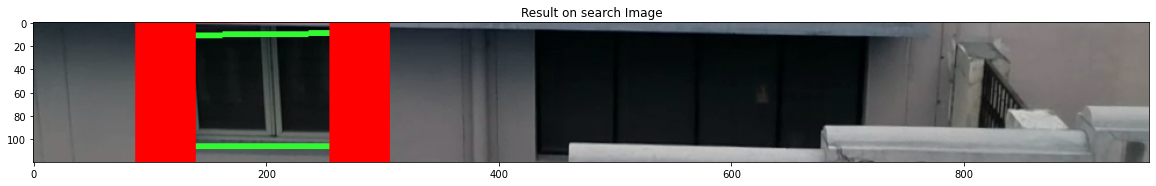

In [131]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)   
template_gray = cv2.cvtColor(rotatedTemplate, cv2.COLOR_BGR2GRAY)   
searchImg_gray = cv2.cvtColor(searchImg, cv2.COLOR_BGR2GRAY)

# Store width in variable w and height in variable h of template  
w, h = template_gray.shape[::-1]   
# Now we perform match operations.   
res = cv2.matchTemplate(searchImg_gray,template_gray,cv2.TM_CCOEFF_NORMED)   
# Declare a threshold   
threshold = 0.550
# Store the coordinates of matched region in a numpy array   
loc = np.where( res >= threshold)
print(loc)
# Draw a rectangle around the matched region.   
for pt in zip(*loc[::-1]): 
    print('x: ' + str(pt[0]) + ' y: ' + str(pt[1]))
    cv2.rectangle(searchImg, pt, (pt[0] + w, pt[1] + h), (255,0,0), 1)   
# Now display the final matched template image   
plt.figure(figsize=(20,10))
plt.imshow(searchImg)  
plt.title('Result on search Image')
#cv2.imwrite('Template_' +  '0.6_threshold_' + fileName, template)
#cv2.imwrite('TemplateMatched_'  + '0.6_threshold_' + fileName, searchImg)

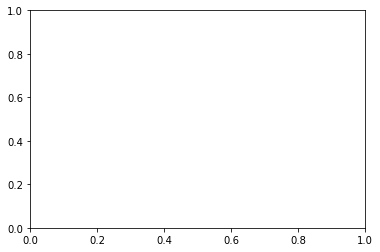

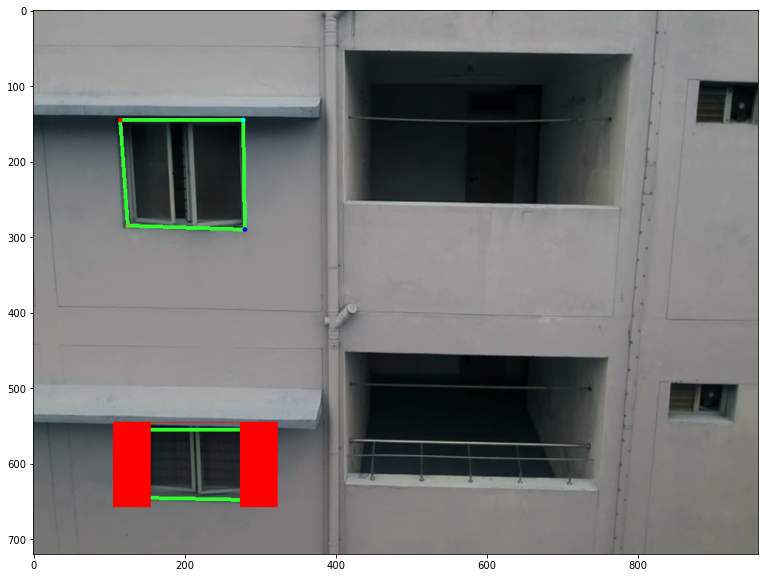

In [113]:
plt.subplot(1,1,1)
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)

In [100]:
def mapCoordsToOriginalFrame(coords, searchImgCoords):
    mappedCoords = []
    startX, endX, startY, endY = searchImgCoords
    
    for i in range(len(coords)):
        mappedCoords.append([coords[i][0], coords[i][1] + startY])
    return mappedCoords
searchImgCoords = startX, endX, startY, endY
mappedCoords = mapCoordsToOriginalFrame([[328,0], [695, 0]], searchImgCoords)
print(mappedCoords)

[[328, 545], [695, 545]]


Text(0.5, 1.0, 'Final Result')

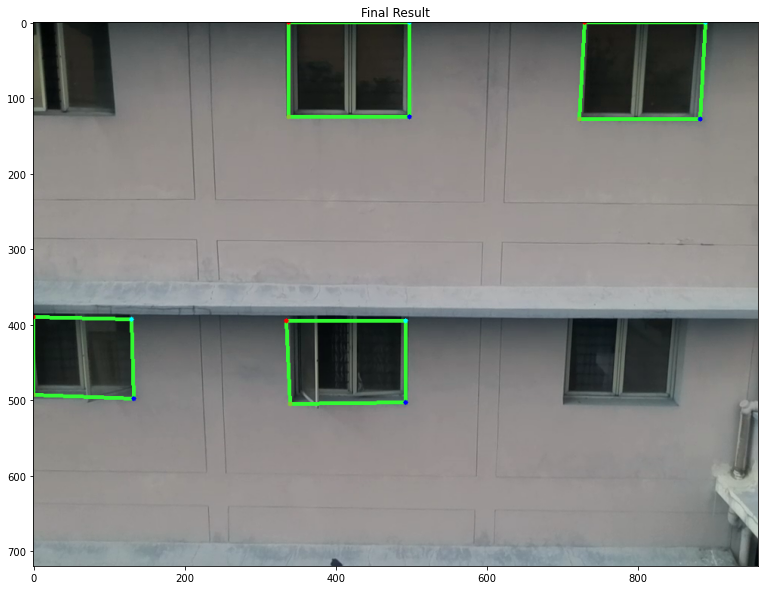

In [141]:
for pt in (mappedCoords): 
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,0), 1)   
# Now display the final matched template image   
plt.figure(figsize=(20,10))
plt.imshow(img)  
plt.title('Final Result')